# Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,1
4,0,1,0
5,0,1,1


# 2. Univariate feature selection

In [ ]:
from sklearn.datasets import make_regression, make_classification
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.metrics import mean_squared_error

# Вибір ознак для задачі регресії

In [ ]:
X, y = make_regression(n_samples=10000, n_features=100, n_informative=10, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression().fit(X,y)

y_pred = lr.predict(X)

round(mean_squared_error(y, y_pred), 10)

0.0

In [ ]:
fs = SelectKBest(score_func=f_regression, k=9)

X_selected = fs.fit_transform(X, y)
X_selected.shape

(10000, 9)

In [ ]:
lr = LinearRegression().fit(X_selected,y)

y_pred = lr.predict(X_selected)

round(mean_squared_error(y, y_pred), 10)

424.2398048132

In [ ]:
X_selected

In [ ]:
y[:5]

Отримали ті колонки даних, які алгоритм виявив, як найбільш впливові на цільову змінну.

# Вибір ознак для задачі класифікації

In [ ]:
X, y = make_classification(n_samples= 100, n_features=20, n_informative=2)

In [ ]:
fs = SelectKBest(score_func=f_classif, k=2)
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


## Давайте розглянемо реальну задачу


Набір даних - breast cancer - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [ ]:
# df = pd.read_csv('breast-cancer-data.csv')
# df.columns = ["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
# df.to_csv('breast-cancer-data.csv', index=False)
df = pd.read_csv('breast-cancer-data.csv')
df.head(5)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (190, 9) (190,)
Test (95, 9) (95,)


In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(pd.concat([X_train,X_test]))
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test, method, k):
    fs = SelectKBest(score_func=method, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
def fit_evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(classification_report(y_train, y_train_pred, digits=3))
    print(classification_report(y_test, y_test_pred, digits=3))
    return model

In [ ]:
X_train.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [ ]:
X_train

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
48,40-49,premeno,20-24,0-2,no,1,right,left_low,no
230,40-49,premeno,30-34,3-5,no,2,right,left_up,no
164,40-49,premeno,20-24,3-5,no,2,right,left_up,no
202,50-59,ge40,35-39,0-2,no,2,left,left_low,no
33,50-59,ge40,10-14,0-2,no,1,left,left_up,no
...,...,...,...,...,...,...,...,...,...
203,50-59,premeno,25-29,0-2,no,2,left,right_up,no
255,40-49,premeno,30-34,0-2,no,1,left,left_low,yes
72,50-59,premeno,15-19,0-2,no,2,right,right_low,no
235,40-49,premeno,25-29,0-2,no,2,right,left_low,no


In [ ]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
y_train_enc

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

Побудуємо модель використовуючи всі ознаки

In [ ]:
model = fit_evaluate_model(X_train_enc, y_train_enc,X_test_enc,y_test_enc)

              precision    recall  f1-score   support

           0      0.791     0.933     0.856       134
           1      0.719     0.411     0.523        56

    accuracy                          0.779       190
   macro avg      0.755     0.672     0.689       190
weighted avg      0.770     0.779     0.758       190

              precision    recall  f1-score   support

           0      0.750     0.864     0.803        66
           1      0.526     0.345     0.417        29

    accuracy                          0.705        95
   macro avg      0.638     0.604     0.610        95
weighted avg      0.682     0.705     0.685        95



### Chi2 критерій

Feature 0: 1.269104
Feature 1: 1.369426
Feature 2: 6.088863
Feature 3: 44.563154
Feature 4: 2.722427
Feature 5: 9.343286
Feature 6: 1.926827
Feature 7: 0.026698
Feature 8: 7.052832


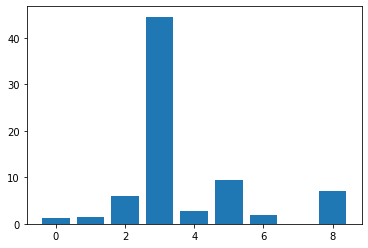

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, method=chi2, k='all')

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Візьмемо лиш деякі найважливі ознаки, визначені за допомою Хі2.

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, method=chi2, k=4)

In [ ]:
model = fit_evaluate_model(X_train_fs, y_train_enc, X_test_fs, y_test_enc)

              precision    recall  f1-score   support

           0      0.761     0.925     0.835       134
           1      0.630     0.304     0.410        56

    accuracy                          0.742       190
   macro avg      0.695     0.614     0.622       190
weighted avg      0.722     0.742     0.710       190

              precision    recall  f1-score   support

           0      0.762     0.970     0.853        66
           1      0.818     0.310     0.450        29

    accuracy                          0.768        95
   macro avg      0.790     0.640     0.652        95
weighted avg      0.779     0.768     0.730        95



# На тестовій вибірці результат став кращий. Вірогідно, модель стала краще генералізувати

### Метод mutual information 

Feature 0: 0.000000
Feature 1: 0.030847
Feature 2: 0.000000
Feature 3: 0.019029
Feature 4: 0.047044
Feature 5: 0.022961
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


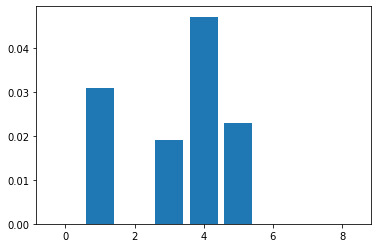

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, method=mutual_info_classif, k='all')

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, method=mutual_info_classif, k=4)

In [ ]:
model = fit_evaluate_model(X_train_fs, y_train_enc, X_test_fs, y_test_enc)

              precision    recall  f1-score   support

           0      0.755     0.918     0.828       134
           1      0.593     0.286     0.386        56

    accuracy                          0.732       190
   macro avg      0.674     0.602     0.607       190
weighted avg      0.707     0.732     0.698       190

              precision    recall  f1-score   support

           0      0.732     0.909     0.811        66
           1      0.538     0.241     0.333        29

    accuracy                          0.705        95
   macro avg      0.635     0.575     0.572        95
weighted avg      0.673     0.705     0.665        95



Для того, щоб обрати найкращий алгорит вартує повторити експеримент кілька разів і порахувати середню ефективність (із-за стохастичної природи алгоритму, ми можемо отримувати різні результати). Також не забуваємо про крос-валідалію )))

# RFE (Recursive Feature elimination)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Класифікація з трьома інформативними ознаками
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

In [ ]:
# Створюємо RFE обʼєкт
regr = LogisticRegression()

min_features_to_select = 1  
rfecv = RFECV(
    estimator=regr,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


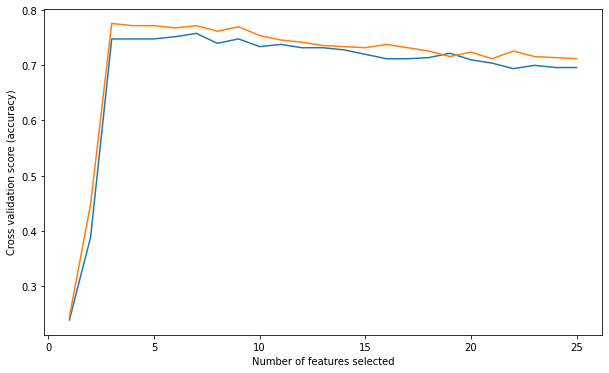

In [ ]:
# Кількість ознак і відповідні значення валідаційної помилки
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# Model-based і послідовний відбір ознак

In [ ]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

In [ ]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Важливість ознак

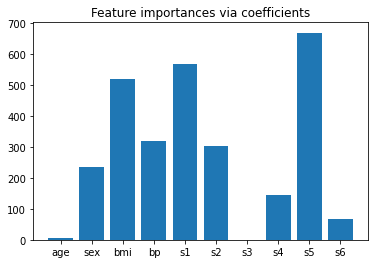

In [ ]:
lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

### Відбір ознак на основі їх важливості

In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

In [ ]:
threshold

521.748542606749

In [ ]:
tic = time()
sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.063s


## Послідовний відбір ознак: Forward Selection і Backward Elimination

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="forward"
).fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="backward"
).fit(X, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['bmi' 's5']
Done in 4.263s
Features selected by backward sequential selection: ['bmi' 's5']
Done in 12.399s


## Аналіз результатів

Вцілому Forward і Backward Selection не обовʼязково приводять до однакового набору ознак, хоча в нашому випадку це так.

SequentialFeatureSelector обрав інші ознаки, ніж метод SelectFromModel. Але bmi - третя по важливості ознака, тому все логічно. Це показово, адже SFS взагалі не використовує коефіцієнти моделі для оцінки важливості

SelectFromModel працює значно швидше, ніж SFS. адже модель будується лиш раз. Натомість SequentialFeatureSelector може працювати з будь-якою моделлю, незалежно від того, чи показують її коефіцієнти важливість.

# PCA

## Покроково

Датасет https://archive.ics.uci.edu/ml/datasets/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df_wine.shape

(178, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
eigen_vals

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

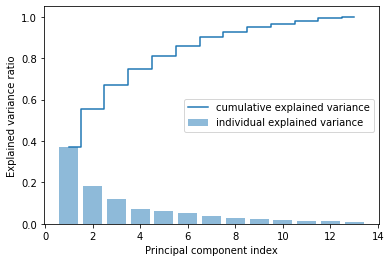

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,14), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Виконаємо трансформацію ознак

In [ ]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Сортуємо пари власних числе і векторів
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [ ]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [ ]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [ ]:
X_train_pca = X_train_std.dot(w)

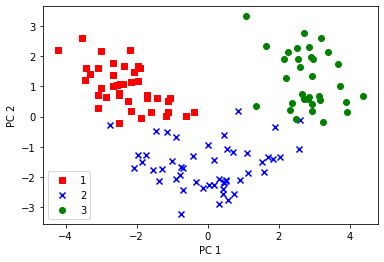

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

## Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# intialize pca and logistic regression model
pca = PCA(n_components=2)

# fit and transform data
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

Порівняємо якість моделі до зменшення розмірності і після

In [ ]:
fit_evaluate_model(X_train_std, y_train, X_test_std, y_test)

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        41
           2      1.000     1.000     1.000        50
           3      1.000     1.000     1.000        33

    accuracy                          1.000       124
   macro avg      1.000     1.000     1.000       124
weighted avg      1.000     1.000     1.000       124

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        18
           2      1.000     1.000     1.000        21
           3      1.000     1.000     1.000        15

    accuracy                          1.000        54
   macro avg      1.000     1.000     1.000        54
weighted avg      1.000     1.000     1.000        54



LogisticRegression()

In [ ]:
fit_evaluate_model(X_train_pca, y_train, X_test_pca, y_test)

              precision    recall  f1-score   support

           1      0.976     1.000     0.988        41
           2      1.000     0.960     0.980        50
           3      0.971     1.000     0.985        33

    accuracy                          0.984       124
   macro avg      0.982     0.987     0.984       124
weighted avg      0.984     0.984     0.984       124

              precision    recall  f1-score   support

           1      0.938     0.833     0.882        18
           2      0.870     0.952     0.909        21
           3      1.000     1.000     1.000        15

    accuracy                          0.926        54
   macro avg      0.936     0.929     0.930        54
weighted avg      0.928     0.926     0.925        54



LogisticRegression()

Тобто замість 13 ознак, ми використали лиш дві, а якість моделі знизилась несуттєво

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

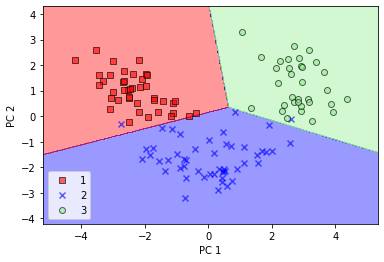

In [ ]:
from matplotlib.colors import ListedColormap 

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl) 


plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

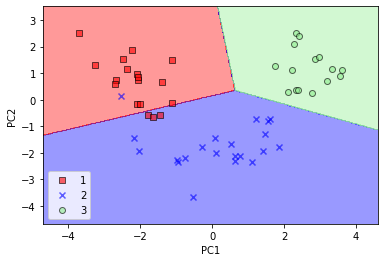

In [ ]:
# візуалізуємо тестову вибірку
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()